`imports`, you've seen this before!

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import geopy
from geopy.geocoders import Nominatim
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [2]:
%matplotlib inline

In [3]:
if os.path.isfile("international_air_traffic_data_set.csv"):
    filepath = "international_air_traffic_data_set.csv"
    print("loading from file")
else:
    filepath = "https://data.gov.au/data/dataset/d9fbffaa-836f-4f52-80e8-324249ff269f/resource/ebcafd83-9514-4f72-a995-fe7ee90cb9da/download/city_pairs.csv"
    print("loading from the internet")

international_air_traffic_data_set = pd.read_csv(filepath)
print("done")

loading from file
done


In [187]:
def fold(given):
    """Return canonical versions of inputs."""
    
    # Use canonical variables so that you can define once, use many times.
    UNSW_canonical = "uni of stairs"
    ben_name_cannonical = "Ben Doherty"

    # dictionary of input:output pairs
    folds = {
        "NewYork": New York,
        "UnitedArabEmirates": United Arab Emirates,
        "KualaLumpur": Kuala Lumpur,
        "AbuDhabi": Abu Dhabi
        "WesternSamoa": Western Samoa,
        "BandarSeriBegawan": Bandar Seri Begawan,
        "SolomonIslands": Solomon Islands,
        "NewCaledonia": New Caledonia,
        "PapuaNewGuinea": Papua New Guinea,
        "Newzealand":New Zealand,
        "SanFrancisco" : San Francisco,
        "NewDelhi" : New Delhi,
        "SouthAfrica" : South Africa,
        "KotaKinabalu" : Kota Kinabalu,
        "CookIslands" : Cook Islands,
    }

#     return folds[given] # needs a defensive part, but ommited for clarity.
    default_value = given
    return folds.get(given, default_value)

print(fold("AbuDhabi"))
print(fold("NewYork"))

SyntaxError: invalid syntax (<ipython-input-187-6a5b3aa70800>, line 10)

In [ ]:
df = pd.read_csv("international_air_traffic_data_set.csv")
df.head()

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,31048,Adelaide,Auckland,New Zealand,1513.0,42.167,0.311,985.0,18.704,0.924,2498.0,60.871,1.235,1985,1
1,31048,Adelaide,Bahrain,Bahrain,12.0,0.000,0.000,5.0,0.033,0.000,17.0,0.033,0.000,1985,1
2,31048,Adelaide,Bombay,India,7.0,0.000,0.000,5.0,0.000,0.000,12.0,0.000,0.000,1985,1
3,31048,Adelaide,Frankfurt,Germany,115.0,0.009,0.000,171.0,0.000,0.248,286.0,0.009,0.248,1985,1
4,31048,Adelaide,London,UK,1567.0,2.800,0.000,1472.0,10.618,2.487,3039.0,13.418,2.487,1985,1


looking at the info for the code - are there any null values? what are the objects type?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82499 entries, 0 to 82498
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month                   82499 non-null  int64  
 1   AustralianPort          82499 non-null  object 
 2   ForeignPort             82499 non-null  object 
 3   Country                 82499 non-null  object 
 4   Passengers_In           82487 non-null  float64
 5   Freight_In_(tonnes)     82495 non-null  float64
 6   Mail_In_(tonnes)        82495 non-null  float64
 7   Passengers_Out          82489 non-null  float64
 8   Freight_Out_(tonnes)    82495 non-null  float64
 9   Mail_Out_(tonnes)       82495 non-null  float64
 10  Passengers_Total        82489 non-null  float64
 11  Freight_Total_(tonnes)  82499 non-null  float64
 12  Mail_Total_(tonnes)     82499 non-null  float64
 13  Year                    82499 non-null  int64  
 14  Month_num               82499 non-null

<AxesSubplot:>

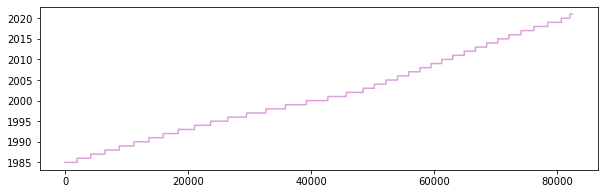

In [ ]:
df.Passengers_In.value_counts(dropna=False)
pc = df[["Passengers_In", "Year"]]
pc.Year.plot(kind="line", color="plum", figsize=(10,3))

<AxesSubplot:xlabel='Country', ylabel='count'>

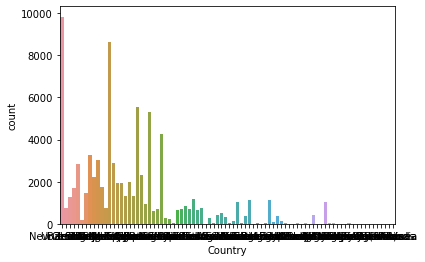

In [ ]:
sns.countplot(x="Country", data=df)


Groups the data by Airport

In [ ]:
for group_key, group_value in df.groupby("AustralianPort"):
    print(group_key)
    print(group_value)

Groups the data fram by year

In [ ]:
for group_key, group_value in df.groupby("Year"):
    print(group_key)
    print(group_value)

In [ ]:
df.loc[df.AustralianPort == "Sydney"].groupby("AustralianPort").agg({"Year" : ["count"]})

In [ ]:
df.groupby(["Year", "AustralianPort", "ForeignPort"]).size()

In [ ]:
df.groupby("Year").size()

Year
1985    1944
1986    2224
1987    2284
1988    2361
1989    2369
1990    2471
1991    2281
1992    2469
1993    2656
1994    2600
1995    2807
1996    3035
1997    3157
1998    3162
1999    3407
2000    3502
2001    2970
2002    2769
2003    1820
2004    1877
2005    1898
2006    1830
2007    1824
2008    1792
2009    1738
2010    1791
2011    1875
2012    1808
2013    1848
2014    1786
2015    1828
2016    1949
2017    2106
2018    2240
2019    2219
2020    1373
2021     429
dtype: int64

In [42]:
 world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
 cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [47]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


This just plots the world map 

In [ ]:
world.plot();

This code maps the long and lat data onto a world map

C:\Users\Anthony\anaconda3\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Text(132.31816568045366, 0.5, 'Latitude')

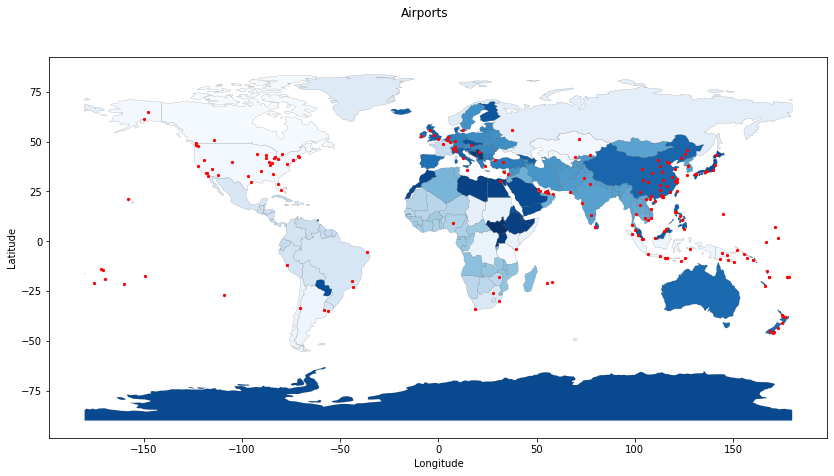

In [31]:
# the data frame with the long and lat coordinates
data = long_lat
# tells python the coordinate system
crs={'init':'epsg:4326'}
# defines the geometry
geometry = [Point(xy) for xy in zip(data["longitude"], data["latitude"])]
# loads data from geopandas
geodata = gpd.GeoDataFrame(data,crs=crs, geometry=geometry)

# Loads shape file of the world from geopandas 

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# Formatting stuff is below like colour, text etc
fig, ax = plt.subplots(figsize=(15,7))

world.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=1,linewidth=0.1,cmap="Blues")

#cmaps is the colour map - can check matplotlib for all the colour maps 

geodata.plot(ax=ax, color='red', markersize=5);
fig.suptitle('Airports', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')

This Function looks up a country in the data frame

In [34]:
Look_up_a_Country = df[((df.Country == "Japan"))]
Look_up_a_Country

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num,full_address
31,31048,Brisbane,Tokyo,Japan,536.0,4.085,0.000,384.0,4.713,0.212,920.0,8.798,0.212,1985,1,"Tokyo, Japan"
86,31048,Melbourne,Tokyo,Japan,228.0,42.059,1.404,333.0,15.395,0.892,561.0,57.454,2.296,1985,1,"Tokyo, Japan"
108,31048,Perth,Tokyo,Japan,55.0,3.004,0.000,35.0,13.661,0.262,90.0,16.665,0.262,1985,1,"Tokyo, Japan"
152,31048,Sydney,Tokyo,Japan,5949.0,313.350,15.190,5993.0,185.748,5.289,11942.0,499.098,20.479,1985,1,"Tokyo, Japan"
192,31079,Brisbane,Tokyo,Japan,455.0,7.364,0.000,206.0,5.626,0.312,661.0,12.990,0.312,1985,2,"Tokyo, Japan"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82409,44287,Brisbane,Tokyo,Japan,0.0,39.567,41.454,0.0,139.605,17.499,0.0,179.172,58.953,2021,4,"Tokyo, Japan"
82414,44287,Cairns,Tokyo,Japan,0.0,0.000,0.000,0.0,0.006,0.000,0.0,0.006,0.000,2021,4,"Tokyo, Japan"
82443,44287,Melbourne,Tokyo,Japan,0.0,89.343,10.888,0.0,207.554,3.199,0.0,296.897,14.087,2021,4,"Tokyo, Japan"
82479,44287,Sydney,Nagoya,Japan,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,2021,4,"Nagoya, Japan"


Shows all the travel in January 2010 from Sydney

In [35]:
a = df[(df.Year == 2016) & ((df.AustralianPort == "Sydney")) & ((df.Month_num == 1))]
a

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num,full_address
72289,42370,Sydney,Abu Dhabi,United Arab Emirates,25752.0,225.179,28.035,21830.0,390.943,5.773,47582.0,616.122,33.808,2016,1,"Abu Dhabi, United Arab Emirates"
72290,42370,Sydney,Anchorage,USA,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,2016,1,"Anchorage, USA"
72291,42370,Sydney,Apia,Western Samoa,1873.0,0.649,0.000,1695.0,0.823,0.000,3568.0,1.472,0.000,2016,1,"Apia, Western Samoa"
72292,42370,Sydney,Auckland,New Zealand,83898.0,1695.254,62.605,78138.0,1993.733,65.322,162036.0,3688.987,127.927,2016,1,"Auckland, New Zealand"
72293,42370,Sydney,Bangkok,Thailand,28396.0,487.949,62.163,20693.0,525.443,13.121,49089.0,1013.392,75.284,2016,1,"Bangkok, Thailand"
72294,42370,Sydney,Beijing,China,12199.0,146.124,22.011,10353.0,185.318,18.489,22552.0,331.442,40.500,2016,1,"Beijing, China"
72295,42370,Sydney,Chicago,USA,0.0,514.744,1.703,0.0,0.000,0.000,0.0,514.744,1.703,2016,1,"Chicago, USA"
72296,42370,Sydney,Chongqing,China,1904.0,22.095,0.000,1415.0,288.292,0.000,3319.0,310.387,0.000,2016,1,"Chongqing, China"
72297,42370,Sydney,Christchurch,New Zealand,29122.0,845.485,0.172,28341.0,129.653,0.145,57463.0,975.138,0.317,2016,1,"Christchurch, New Zealand"
72298,42370,Sydney,Dallas,USA,9642.0,19.622,0.000,10511.0,16.498,0.000,20153.0,36.120,0.000,2016,1,"Dallas, USA"


Shows the first and last year that an airport had been used

In [41]:
df.groupby("AustralianPort").agg({"Year" : ["count", "min", "max"]})

Year            
                        count   min   max
AustralianPort                           
Adelaide                 5967  1985  2021
Brisbane                13628  1985  2021
Broome                     37  1996  2001
Cairns                   6752  1985  2021
Canberra                   94  2004  2021
Christmas Island           80  1993  2008
Darwin                   4383  1985  2021
Gold Coast                970  2008  2021
Gold Coast/Coolangatta    503  1996  2008
GoldCoast                   8  2020  2020
Hobart                    319  1985  2021
Melbourne               16471  1985  2021
Newcastle                  18  2001  2020
Norfolk Island            418  1985  2020
NorfolkIsland               1  2020  2020
Perth                    8890  1985  2021
Port Hedland              286  1985  2020
PortHedland                 1  2020  2020
Sunshine Coast             37  2012  2019
Sydney                  22911  1985  2021
Toowoomba Wellcamp         64  2016  2021
ToowoombaWellcamp           1  2020  2020
Townsville                660  1985  2018

Shows the first and last year that a country had been travelled to

In [115]:
df.groupby("ForeignPort").agg({"Year" : ["count", "min", "max"]})

Year            
            count   min   max
ForeignPort                  
Abu Dhabi     808  1985  2021
AbuDhabi        3  2020  2020
Abuja           3  2007  2010
Al Ain          1  2009  2009
Almaty         17  2005  2019
...           ...   ...   ...
Xi'an          81  2015  2020
Xiamen        111  2015  2021
Zagreb         22  1985  1987
Zhengzhou      46  2013  2020
Zurich        128  1989  2000

[203 rows x 3 columns]

In [144]:
a = df.groupby("ForeignPort").agg({"Passengers_Total" : ["count", "min", "max"]})

Passengers_Total                 
                       count     min      max
ForeignPort                                  
Abu Dhabi                808     0.0  54479.0
AbuDhabi                   3  7196.0  24612.0
Abuja                      3     0.0      0.0
Al Ain                     1     0.0      0.0
Almaty                    17     0.0      0.0
...                      ...     ...      ...
Xi'an                     81  1015.0   4884.0
Xiamen                   111     0.0   7027.0
Zagreb                    22     1.0    301.0
Zhengzhou                 46     0.0   3553.0
Zurich                   128     1.0    158.0

[203 rows x 3 columns]

In [89]:
df.groupby("AustralianPort").size()

AustralianPort
Adelaide                   5967
Brisbane                  13628
Broome                       37
Cairns                     6752
Canberra                     94
Christmas Island             80
Darwin                     4383
Gold Coast                  970
Gold Coast/Coolangatta      503
GoldCoast                     8
Hobart                      319
Melbourne                 16471
Newcastle                    18
Norfolk Island              418
NorfolkIsland                 1
Perth                      8890
Port Hedland                286
PortHedland                   1
Sunshine Coast               37
Sydney                    22911
Toowoomba Wellcamp           64
ToowoombaWellcamp             1
Townsville                  660
dtype: int64

In [111]:
df.AustralianPort.value_counts(dropna=False)

Sydney                    22911
Melbourne                 16471
Brisbane                  13628
Perth                      8890
Cairns                     6752
Adelaide                   5967
Darwin                     4383
Gold Coast                  970
Townsville                  660
Gold Coast/Coolangatta      503
Norfolk Island              418
Hobart                      319
Port Hedland                286
Canberra                     94
Christmas Island             80
Toowoomba Wellcamp           64
Broome                       37
Sunshine Coast               37
Newcastle                    18
GoldCoast                     8
NorfolkIsland                 1
PortHedland                   1
ToowoombaWellcamp             1
Name: AustralianPort, dtype: int64

In [23]:
df.sort_values(by=["Passengers_Total", "AustralianPort"])

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
1437,31321,Adelaide,Bangkok,Thailand,0.0,0.00,0.0,0.0,0.037,0.000,0.0,0.037,0.000,1985,10
1438,31321,Adelaide,Belgrade,Yugoslavia,0.0,0.00,0.0,0.0,0.000,0.008,0.0,0.000,0.008,1985,10
2483,31503,Adelaide,Harare,Zimbabwe,0.0,0.00,0.0,0.0,0.000,0.009,0.0,0.000,0.009,1986,4
10978,32843,Adelaide,Amsterdam,Netherlands,0.0,0.00,0.0,0.0,0.009,0.000,0.0,0.009,0.000,1989,12
13456,33208,Adelaide,Vancouver,Canada,0.0,0.00,0.0,0.0,0.000,0.327,0.0,0.000,0.327,1990,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81177,43891,Sydney,Chongqing,China,NaN,NaN,NaN,NaN,590.890,0.000,NaN,590.890,0.000,2020,3
81179,43891,Sydney,Cincinnati,USA,NaN,0.00,0.0,NaN,NaN,NaN,NaN,0.000,0.000,2020,3
81195,43891,Sydney,Louisville,USA,NaN,1278.30,0.0,NaN,NaN,NaN,NaN,1278.300,0.000,2020,3
81212,43891,Sydney,Shenzhen,China,NaN,NaN,NaN,NaN,0.620,0.000,NaN,0.620,0.000,2020,3


In [31]:
#boolean indexing 
dfa = df[["Year", "AustralianPort", "ForeignPort", "Country", "Passengers_In", "Passengers_Out", "Passengers_Total"]]
Sydney = dfa[(dfa.AustralianPort == "Sydney") & (dfa.Country == "USA")]
Sydney.sort_values(by=["Passengers_Total", "AustralianPort"])
Sydney.tail()

,Year,AustralianPort,ForeignPort,Country,Passengers_In,Passengers_Out,Passengers_Total
82472,2021,Sydney,Honolulu,USA,0.0,0.0,0.0
82475,2021,Sydney,Los Angeles,USA,1707.0,1647.0,3354.0
82476,2021,Sydney,Louisville,USA,0.0,0.0,0.0
82482,2021,Sydney,New York,USA,0.0,0.0,0.0
82486,2021,Sydney,San Francisco,USA,598.0,913.0,1511.0


In [36]:
most_passengers = df[["Year", "AustralianPort", "ForeignPort", "Country", "Passengers_In", "Passengers_Out", "Passengers_Total"]]
most_passengers.Passengers_Out.value_counts()
most_passengers

,Year,AustralianPort,ForeignPort,Country,Passengers_In,Passengers_Out,Passengers_Total
0,1985,Adelaide,Auckland,New Zealand,1513.0,985.0,2498.0
1,1985,Adelaide,Bahrain,Bahrain,12.0,5.0,17.0
2,1985,Adelaide,Bombay,India,7.0,5.0,12.0
3,1985,Adelaide,Frankfurt,Germany,115.0,171.0,286.0
4,1985,Adelaide,London,UK,1567.0,1472.0,3039.0
...,...,...,...,...,...,...,...
82494,2021,Sydney,Vancouver,Canada,0.0,0.0,0.0
82495,2021,Sydney,Wellington,New Zealand,1115.0,1808.0,2923.0
82496,2021,Sydney,Xiamen,China,341.0,748.0,1089.0
82497,2021,Toowoomba Wellcamp,Hong Kong,Hong Kong (SAR),0.0,0.0,0.0


Shows just the data on passengers

In [27]:
passengers = df[["AustralianPort", "ForeignPort", "Country", "Passengers_In", "Passengers_Out", "Passengers_Total"]]
passengers.head()

,AustralianPort,ForeignPort,Country,Passengers_In,Passengers_Out,Passengers_Total
0,Adelaide,Auckland,New Zealand,1513.0,985.0,2498.0
1,Adelaide,Bahrain,Bahrain,12.0,5.0,17.0
2,Adelaide,Bombay,India,7.0,5.0,12.0
3,Adelaide,Frankfurt,Germany,115.0,171.0,286.0
4,Adelaide,London,UK,1567.0,1472.0,3039.0


In [139]:
df.head()

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,31048,Adelaide,Auckland,New Zealand,1513.0,42.167,0.311,985.0,18.704,0.924,2498.0,60.871,1.235,1985,1
1,31048,Adelaide,Bahrain,Bahrain,12.0,0.000,0.000,5.0,0.033,0.000,17.0,0.033,0.000,1985,1
2,31048,Adelaide,Bombay,India,7.0,0.000,0.000,5.0,0.000,0.000,12.0,0.000,0.000,1985,1
3,31048,Adelaide,Frankfurt,Germany,115.0,0.009,0.000,171.0,0.000,0.248,286.0,0.009,0.248,1985,1
4,31048,Adelaide,London,UK,1567.0,2.800,0.000,1472.0,10.618,2.487,3039.0,13.418,2.487,1985,1


This gather the longitude data from geocode

      latitude   longitude
0   -36.852095  174.763180
1    26.155125   50.534461
2    19.075990   72.877393
3    50.110644    8.682092
4    51.507322   -0.127647
..         ...         ...
191 -12.062107  -77.036526
192  21.156300  107.483626
193  11.568271  104.922443
194   1.106103  104.037825
195   6.112331  125.171714

[196 rows x 2 columns]


In [4]:
import pandas as pd
import geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(timeout=10, user_agent = "myGeolocator")
df = pd.read_csv("international_air_traffic_data_set.csv")
#maybe need to remove the below line
df["full_address"] = df.ForeignPort + ", " + df.Country
unique_ports = df.full_address.unique()
lat = []
lon = []
ports = []
locations = []
for port in unique_ports:
    try:
        location = geolocator.geocode(port)
        lat.append(location.latitude)
        lon.append(location.longitude)
        locations.append(location)
        ports.append(port)
        print(location.longitude, location.latitude)
    except:
        if location == None:
            print(port)
di = {"port":ports, "locations":locations, "latitude":lat, "longitude":lon}
dz = {"latitude":lat, "longitude":lon}
port_df = pd.DataFrame(di)
long_lat = pd.DataFrame(dz)

174.7631803 -36.852095
50.5344606 26.1551249
72.8773928 19.0759899
8.6820917 50.1106444
-0.1276474 51.5073219
58.3829448 23.5882019
12.4829321 41.8933203
103.8194992 1.357107
54.3774014 24.4538352
100.4930399 13.7544238
172.6366455 -43.530955
114.1628131 22.2793278
159.9624174786047 -9.437797549999999
-157.855676 21.304547
101.6942371 3.1516964
-118.242766 34.0536909
120.9809674 14.5907332
177.4172058 -17.7993389
166.442419 -22.2745264
147.1599504 -9.4743301
168.3150163 -17.7414972
-122.419906 37.7790262
178.4421662 -18.1415884
139.7594549 35.6828387
-123.1139529 49.2608724
174.7772114 -41.2887953
114.9417574 4.8895453
115.2191175 -8.6524973
106.827183 -6.1753942
4.8936041 52.3727598
23.7283052 37.9839412
116.3912757 39.906217
20.452295813899802 44.788099349999996
79.8541134 6.9387469
55.18853865430702 25.074282349999997
-95.3676974 29.7589382
33.6236184 34.9236095
-2.2451148 53.4794892
57.5703566 -20.2759451
166.9324426 -0.5252306
-74.0060152 40.7127281
-149.5595064 -17.5360234
31.045

Same code as above but with annotations

In [ ]:
#import all these - in the link it shows you how to install them
import pandas as pd
import geopy
from geopy.geocoders import Nominatim

#I don't really understand code but this line makes it all work
geolocator = Nominatim(timeout=10, user_agent = "myGeolocator")

#This is just me reading in my data frame
df = pd.read_csv("international_air_traffic_data_set.csv")

#this concatinates the columns for city name and country - e.g. Auckland, New Zealand
df["full_address"] = df.ForeignPort + ", " + df.Country

# My data frame has over 82000 rows, so I only want to look for the unique cities because there are only 203
# therefore less time waiting for all the data to load
unique_ports = df.full_address.unique()

# here im creating "buckets" or "empty lists" to fill in the data that comes back from the api
lat = []
lon = []
ports = []
locations = []

# This loop goes through each city in the "unique cities" list and get the geocode data from the internet
for port in unique_ports:
    try:
        location = geolocator.geocode(port)
        lat.append(location.latitude)
        lon.append(location.longitude)
        locations.append(location)
        ports.append(port)
        print(location.longitude, location.latitude)
    except:
        # i put in an except loop because sometimes the api doesnt recognise a city name
        # if it return no value then it prints the name of the city it couldnt find
        # im having some trouble at the moment with cases its getting confused somewhere along the way
        # It doesnt like "NewYork" it likes "New York" it has to have a space - somewhere my code is removing the space
        if location == None:
            # by printing "port" you can see which cities it cant find
            print(port)
# this bit takes those lists from above and puts them in a dictionary
di = {"port":ports, "locations":locations, "latitude":lat, "longitude":lon}
# this converts the dictionary into a data frame
port_df = pd.DataFrame(di)